In [1]:
import requests as rq
from datetime import datetime
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
start_time = "2021-07-22%2000:00:00"
end_time = "2021-07-29%2000:00:00"
token = rq.post(url = f"https://aqrt.nrs.gov.bc.ca/Export/DataSetToken?DataSet=SGWL.Working%40OW283&StartTime={start_time}&EndTime={end_time}&ExportFormat=csv&Compressed=false&RoundData=False&Unit=306&Timezone=-7").json()["Token"]
raw_csv = rq.get(url = f"https://aqrt.nrs.gov.bc.ca/Export/DataSet?DataSet=SGWL.Working%40OW283&StartTime={start_time}&EndTime={end_time}&ExportFormat=csv&Compressed=false&RoundData=False&Unit=306&Timezone=-7&Token={token.replace('+', '%2B').replace('/', r'%2F')}")
reader = csv.reader(raw_csv.text.splitlines())

In [3]:
def clean_and_process(stamp: str, value: str, code: str):
    try:
        if int(code) < 0:
            return False
    except ValueError:
        return False
    return (
        datetime.fromisoformat(stamp + '-07:00'),
        -float(value)
    )

cleaned = np.transpose(tuple(filter(lambda x: x, map(lambda x: clean_and_process(x[0], x[1], x[3]), reader))))

In [4]:
levels = cleaned[1]
dates = cleaned[0]

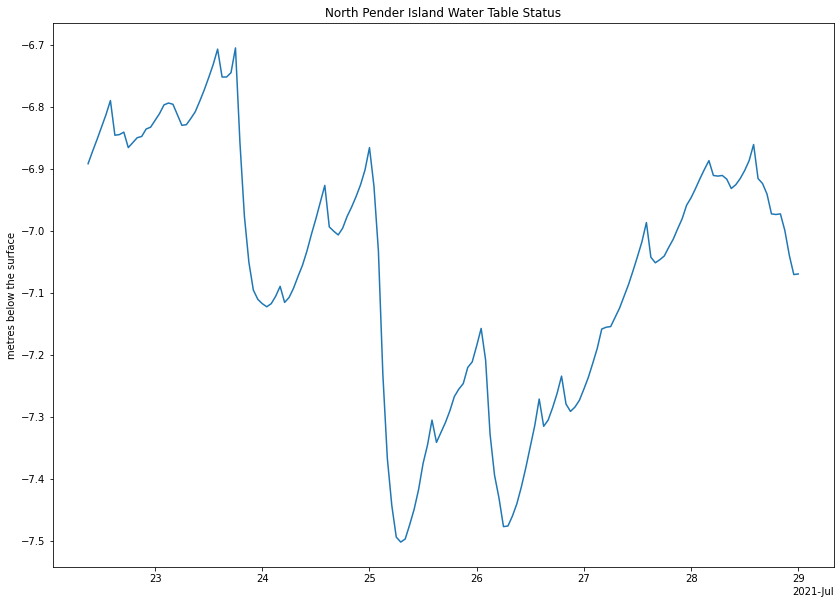

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)

ax.set_ylabel("metres below the surface")
ax.set_title("North Pender Island Water Table Status")

locator = mdates.AutoDateLocator(minticks=3, maxticks=10)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

last_week = ax.plot(dates, levels)